<a href="https://colab.research.google.com/github/emilia-uncc/IntroML/blob/main/Assignment2/Assignment2_1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt
import seaborn as sns

#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/DataSets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
housing.shape

(545, 13)

In [ ]:
# Checking Null values
housing.isnull().sum()*100/housing.shape[0]
# There are no NULL values in the dataset, hence it is clean.

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [ ]:
# List of variables to map, yes/no variables to 0/1 variables

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
#df_train = training set, #df_test = testset
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)


In [ ]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,furnished
41,7840000,6360,3,2,4,1,0,0,0,1,0,1,furnished
91,6419000,6750,2,1,1,1,1,1,0,0,2,1,furnished
118,5950000,6420,3,1,1,1,0,1,0,1,0,1,furnished
472,3010000,3630,4,1,2,1,0,0,0,0,3,0,semi-furnished


In [ ]:
y_train = df_train.pop('price') # price is the ground truth
X_train = df_train #X_train is the actual training set
X_train.head()


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8050,3,1,1,1,1,1,0,1,1,0,furnished
41,6360,3,2,4,1,0,0,0,1,0,1,furnished
91,6750,2,1,1,1,1,1,0,0,2,1,furnished
118,6420,3,1,1,1,0,1,0,1,0,1,furnished
472,3630,4,1,2,1,0,0,0,0,3,0,semi-furnished


In [ ]:
#make the whole input values to an numpy array of dimension (381, 12)
#area, bedrooms, bathrooms, stories, parking
m_train=len(y_train) #381
X_0_train = np.ones((m_train, 1))
X_0_train[:5]



array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
area_train =  X_train.values[:, 0]  # get input values from first column -- X_train is a list here
bedrooms_train =  X_train.values[:, 1]  # get input values from second column -- X_train is a list here
bathrooms_train =  X_train.values[:, 2]  # get input values from third column -- X_train is a list here
stories_train =  X_train.values[:, 3]  # get input values from fourth column -- X_train is a list here
parking_train =  X_train.values[:, 9]  # get input values from fifth column -- X_train is a list here

In [ ]:
#getting the whole inputmatrix (381, 6)
area_train = area_train.reshape(m_train, 1)
bedrooms_train = bedrooms_train.reshape(m_train, 1)
bathrooms_train = bathrooms_train.reshape(m_train, 1)
stories_train = stories_train.reshape(m_train, 1)
parking_train = parking_train.reshape(m_train, 1)
#putting it all in one matrix
input_matrix_train = np.hstack((X_0_train, area_train, bedrooms_train, bathrooms_train, stories_train, parking_train))
input_matrix_train[:5]


array([[1.0, 8050, 3, 1, 1, 1],
       [1.0, 6360, 3, 2, 4, 0],
       [1.0, 6750, 2, 1, 1, 2],
       [1.0, 6420, 3, 1, 1, 0],
       [1.0, 3630, 4, 1, 2, 3]], dtype=object)

In [ ]:
#doing the same for testset
df_test.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,semi-furnished
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,semi-furnished
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,semi-furnished
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,semi-furnished
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,semi-furnished


In [ ]:
y_test = df_test.pop('price') # price is the ground truth
X_test = df_test #X_train is the actual training set
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,2880,3,1,2,1,0,0,0,0,0,1,semi-furnished
54,6000,3,2,2,1,1,0,0,1,1,0,semi-furnished
171,10269,3,1,1,1,0,0,0,0,1,1,semi-furnished
244,5320,3,1,2,1,1,1,0,0,0,1,semi-furnished
268,4950,4,1,2,1,0,0,0,1,0,0,semi-furnished


In [ ]:
#make the whole input values to an numpy array of dimension (164, 12)
#area, bedrooms, bathrooms, stories, parking
m_test=len(y_test) #164
X_0_test = np.ones((m_test, 1))
X_0_test[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
area_test =  X_test.values[:, 0]  # get input values from first column -- X_train is a list here
bedrooms_test =  X_test.values[:, 1]  # get input values from second column -- X_train is a list here
bathrooms_test =  X_test.values[:, 2]  # get input values from third column -- X_train is a list here
stories_test =  X_test.values[:, 3]  # get input values from fourth column -- X_train is a list here
parking_test =  X_test.values[:, 9]  # get input values from fifth column -- X_train is a list here
area_test[:5]

array([2880, 6000, 10269, 5320, 4950], dtype=object)

In [ ]:
#getting the whole inputmatrix (381, 6)
area_test = area_test.reshape(m_test, 1)
bedrooms_test = bedrooms_test.reshape(m_test, 1)
bathrooms_test = bathrooms_test.reshape(m_test, 1)
stories_test = stories_test.reshape(m_test, 1)
parking_test = parking_test.reshape(m_test, 1)
#putting it all in one matrix
input_matrix_test = np.hstack((X_0_test, area_test, bedrooms_test, bathrooms_test, stories_test, parking_test))
input_matrix_test[:5]

array([[1.0, 2880, 3, 1, 2, 0],
       [1.0, 6000, 3, 2, 2, 1],
       [1.0, 10269, 3, 1, 1, 1],
       [1.0, 5320, 3, 1, 2, 0],
       [1.0, 4950, 4, 1, 2, 0]], dtype=object)

In [ ]:
train_losses = []
val_losses = []

theta = [0., 0., 0., 0., 0., 0.]
iterations = 200
alpha = 0.000000001

for iteration in range(iterations):
    gradients = (1/m_train) * (input_matrix_train.T.dot(input_matrix_train.dot(theta) - y_train))
    theta -= alpha * gradients
    train_loss = (1/(2*m_train)) * np.sum(np.square(input_matrix_train.dot(theta) - y_train))
    val_loss = (1/(2*m_test)) * np.sum(np.square(input_matrix_test.dot(theta) - y_test))

    train_losses.append(train_loss)
    val_losses.append(val_loss)



#theta, train_loss = gradient_descent(input_matrix_train, y_train, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', train_losses[:5])
print('cost_history =', val_losses[:5])

Final value of theta = [0.2145629506462688 860.3579794015683 0.6970541640524707
 0.3486059394463879 0.5071008539185673 0.1779253333076658]
cost_history = [12531843469686.686, 11868163578396.152, 11245111042412.691, 10660198846487.895, 10111092218727.656]
cost_history = [11882700309161.166, 11229448105473.186, 10616942724881.172, 10042666278093.98, 9504255741665.855]


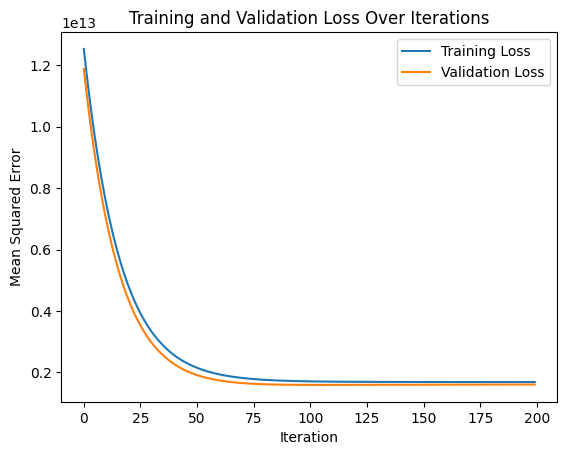

In [ ]:
# 4. Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()